In [76]:
import matplotlib.pyplot as plt

from _preprocessing import CryptoCompareReader, drop_columns_deemed_as_useless
import pandas as pd


reader = CryptoCompareReader('btc', './cryptoCompareData', drop_na_subset=['close'], add_time_columns=True,drop_last=True)
df = reader.read()
df = drop_columns_deemed_as_useless(df)
df.head(5)

,time,high,low,close,BTCTradedToUSD,USDTradedToBTC,new_addresses,active_addresses,transaction_count,large_transaction_count,...,block_height,current_supply,reddit_subscribers,reddit_active_users,reddit_posts_per_hour,reddit_posts_per_day,reddit_comments_per_hour,reddit_comments_per_day,dayOfTheWeek,monthOfTheYear
0,2010-07-17,0.04951,0.04951,0.04951,20.00,0.9902,447.0,804.0,408.0,0.0,...,68779.0,3439000.0,NaN,NaN,NaN,NaN,NaN,NaN,5,7
1,2010-07-18,0.08585,0.05941,0.08584,75.01,5.0920,467.0,917.0,420.0,0.0,...,68951.0,3447600.0,NaN,NaN,NaN,NaN,NaN,NaN,6,7
2,2010-07-19,0.09307,0.07723,0.08080,574.00,49.6600,605.0,972.0,528.0,0.0,...,69125.0,3456300.0,NaN,NaN,NaN,NaN,NaN,NaN,0,7
3,2010-07-20,0.08181,0.07426,0.07474,262.00,20.5900,674.0,906.0,594.0,0.0,...,69306.0,3465350.0,NaN,NaN,NaN,NaN,NaN,NaN,1,7
4,2010-07-21,0.07921,0.06634,0.07921,575.00,42.2600,469.0,809.0,463.0,0.0,...,69513.0,3475700.0,NaN,NaN,NaN,NaN,NaN,NaN,2,7


In [77]:
import numpy as np

x_test = np.load('./splits/test/x_preprocessed.npy')
y_test = np.load('./splits/test/y_preprocessed.npy')
print(x_test.shape)
y_test.shape

(185, 9, 17)


(185, 3)

In [82]:
arr = np.array([[[2,3,4],[6,7,3]],[[2,3,1],[8,6,4]],[[20,30,40],[60,70,30]],[[24,34,44],[64,74,34]]])
arr

array([[[ 2,  3,  4],
        [ 6,  7,  3]],

       [[ 2,  3,  1],
        [ 8,  6,  4]],

       [[20, 30, 40],
        [60, 70, 30]],

       [[24, 34, 44],
        [64, 74, 34]]])

In [83]:
arr.shape #sample * timesteps * feature

(4, 2, 3)

In [105]:
swapped = np.swapaxes(arr,-1,-2) #sample * feature * timesteps
swapped.shape

(4, 3, 2)

In [108]:
ls = []
for feature in range(swapped.shape[1]):
    f = swapped[:,feature,:]
    f = f.reshape((*f.shape,1))
    ls.append(f)
ls = np.array(ls)
ls.shape

(3, 4, 2, 1)

In [110]:
ls[0].shape

(4, 2, 1)

In [134]:
import models

import importlib
importlib.reload(models.transformers)
model = models.transformers.create_encoder_block(ls,8)

In [135]:


from keras import Model

ws = model.get_layer('encoder_0')._multi_head_attention_layer.get_weights()

ValueError: No such layer: transformer_encoder_3. Existing layers are: ['input_6', 'tf.reshape_10', 'tf.compat.v1.shape_5', 'tf.linalg.matmul_5', 'tf.unstack_5', 'tf.reshape_11', 'tf.__operators__.add_11', 'tf.math.multiply_5', 'tf.math.sin_5', 'tf.__operators__.add_10', 'tf.concat_5', 'encoder_0', 'flatten_5', 'dense_10', 'dense_11'].

In [2]:
import _preprocessing

prices_train = _preprocessing.CryptoCompareReader('btc', './splits/train', drop_na_subset=['close'], add_time_columns=True,
                                                  drop_last=True).read()

<AxesSubplot:>

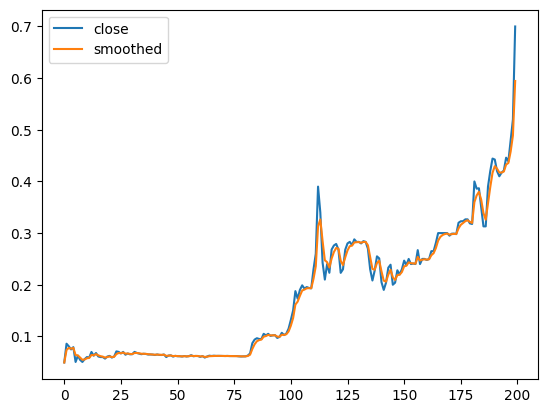

In [3]:

prices_train['smoothed'] = prices_train['close'].ewm(halflife=1).mean()
prices_train[['close','smoothed']].iloc[:200].plot()

In [49]:
import numpy as np
x_train = np.load(r'D:\Egyetem\7.Semester\CryptoPredictions\splits\train\x_preprocessed.npy',allow_pickle=True)
x_train.shape

(3691, 9, 19)

In [59]:
import importlib
import _preprocessing
importlib.reload(_preprocessing)
det = _preprocessing.ManualValidTargetDetector(1,10,5)
prices = det.fit_transform(prices_train)

In [60]:
prices.columns

Index(['Unnamed: 0_x', 'time', 'high', 'low', 'open', 'close',
       'BTCTradedToUSD', 'USDTradedToBTC', 'Unnamed: 0_y',
       'zero_balance_addresses_all_time', 'unique_addresses_all_time',
       'new_addresses', 'active_addresses', 'transaction_count',
       'transaction_count_all_time', 'large_transaction_count',
       'average_transaction_value', 'block_height', 'hashrate', 'difficulty',
       'block_time', 'block_size', 'current_supply', 'Unnamed: 0', 'comments',
       'posts', 'followers', 'fb_likes', 'fb_talking_about',
       'twitter_followers', 'twitter_following', 'twitter_lists',
       'twitter_favourites', 'twitter_statuses', 'reddit_subscribers',
       'reddit_active_users', 'reddit_posts_per_hour', 'reddit_posts_per_day',
       'reddit_comments_per_hour', 'reddit_comments_per_day', 'dayOfTheWeek',
       'monthOfTheYear', 'smoothed', 'is_valid_target'],
      dtype='object')

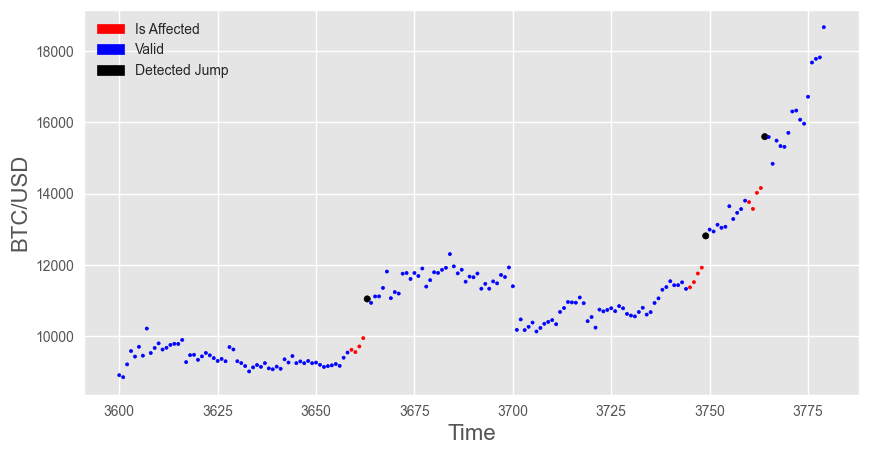

In [90]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use('ggplot')
start = 3600
end = 3780
plt.figure(figsize=(10,5))

jumps = det.jumps


colors = []
s = []
for idx in prices.is_valid_target.iloc[start:end].index.tolist():
    is_valid = prices.is_valid_target.iloc[idx]
    if is_valid == -1:
        colors.append('red')
        s.append(5)
    elif idx in jumps:
        colors.append('black')
        s.append(20)
    else:
        colors.append('blue')
        s.append(5)


plt.scatter(prices.iloc[start:end].index,prices.iloc[start:end]['close'],c=colors,s=s)
plt.ylabel('BTC/USD',fontsize=16)
red_patch = mpatches.Patch(color='red', label='Is Affected')
blue_patch = mpatches.Patch(color='blue', label='Valid')
black_patch = mpatches.Patch(color='black', label='Detected Jump')
plt.legend(handles=[red_patch,blue_patch,black_patch])
plt.xlabel('Time',fontsize=16)
plt.savefig('./documents/figures/jumps.png')

In [76]:
sorted(det.jumps)

[2505,
 2522,
 2524,
 2572,
 2584,
 2586,
 2627,
 2629,
 2635,
 2645,
 2647,
 2661,
 2723,
 2729,
 2733,
 2740,
 2752,
 2755,
 2756,
 2759,
 2834,
 2885,
 3047,
 3052,
 3054,
 3204,
 3220,
 3266,
 3526,
 3586,
 3663,
 3749,
 3764,
 3800,
 3805,
 3810,
 3815,
 3819]

In [75]:
prices.is_valid_target.iloc[start:end].index.tolist()

[3600,
 3601,
 3602,
 3603,
 3604,
 3605,
 3606,
 3607,
 3608,
 3609,
 3610,
 3611,
 3612,
 3613,
 3614,
 3615,
 3616,
 3617,
 3618,
 3619,
 3620,
 3621,
 3622,
 3623,
 3624,
 3625,
 3626,
 3627,
 3628,
 3629,
 3630,
 3631,
 3632,
 3633,
 3634,
 3635,
 3636,
 3637,
 3638,
 3639,
 3640,
 3641,
 3642,
 3643,
 3644,
 3645,
 3646,
 3647,
 3648,
 3649,
 3650,
 3651,
 3652,
 3653,
 3654,
 3655,
 3656,
 3657,
 3658,
 3659,
 3660,
 3661,
 3662,
 3663,
 3664,
 3665,
 3666,
 3667,
 3668,
 3669,
 3670,
 3671,
 3672,
 3673,
 3674,
 3675,
 3676,
 3677,
 3678,
 3679,
 3680,
 3681,
 3682,
 3683,
 3684,
 3685,
 3686,
 3687,
 3688,
 3689,
 3690,
 3691,
 3692,
 3693,
 3694,
 3695,
 3696,
 3697,
 3698,
 3699,
 3700,
 3701,
 3702,
 3703,
 3704,
 3705,
 3706,
 3707,
 3708,
 3709,
 3710,
 3711,
 3712,
 3713,
 3714,
 3715,
 3716,
 3717,
 3718,
 3719,
 3720,
 3721,
 3722,
 3723,
 3724,
 3725,
 3726,
 3727,
 3728,
 3729,
 3730,
 3731,
 3732,
 3733,
 3734,
 3735,
 3736,
 3737,
 3738,
 3739,
 3740,
 3741,
 3742,